# DSCI 503 - Homework 04

### Talaya Francois

In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([ 10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)
mean = np.sum(x)/n
diff = x-mean
sum_of_squared = np.sum(diff ** 2)

var = sum_of_squared / (n - 1)

print(f"Sample Mean: {mean:>8} \nSample Variance: {var}")


Sample Mean:     16.6 
Sample Variance: 25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x, ddof=1)

print(f"Sample Mean: {mean_np} \nSample Variance: {var_np}")

Sample Mean: 16.6 
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    # SSE = (y₁ - ŷ₁)² + (y₂ - ŷ₂)² + (y₃ - ŷ₃)² + ... + (yₙ - ŷₙ)²
    diffs = true_y - pred_y
    squared_diffs = diffs ** 2
    sse_score = np.sum(squared_diffs)
    return sse_score


In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2]) 
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9]) 
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

In [6]:
sse_1 = np.round(find_sse(true_y, pred_1), 2)
sse_2 = np.round(find_sse(true_y, pred_2), 2)

print(f"Model 1 SSE: {sse_1}\nModel 2 SSE: {sse_2}") # How do I get the 0 to show after 19.9?

Model 1 SSE: 22.66
Model 2 SSE: 19.9


## Problem 3: Scoring a Classification Model

In [7]:
def find_accuracy(true_y, pred_y):

    correct_pred = true_y == pred_y # array of booleans if they match or not
    total_correct_preds = np.sum(correct_pred)
    total_observations = len(true_y)
    accuracy = total_correct_preds / total_observations

    return accuracy
    

In [8]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 
'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 
'N', 'P', 'N'])

m_accuracy = find_accuracy(true_diag, pred_diag)

print(f"Model Accuracy: {m_accuracy}")

Model Accuracy: 0.75


In [9]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',  
'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])

pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 
'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

label_accuracy = find_accuracy(true_labels, pred_labels)

print(f"Model Accuracy: {label_accuracy}")

Model Accuracy: 0.875


## Problem 4: Classification Report

In [10]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y) 
    model_accuracy = find_accuracy(true_y, pred_y)
    
    negative = classes[0]
    positive = classes[1]

    predicted_positives = pred_y == positive # array of predicted positives
    actual_positives = true_y == positive # array of true positives
    predicted_negatives = pred_y == negative # array of predicted negatives
    actual_negatives = true_y == negative # array of true negatives

    TP = np.sum(predicted_positives & actual_positives) # total true positives
    FP = np.sum(predicted_positives & actual_negatives) # total false positives
    TN = np.sum(predicted_negatives & actual_negatives) # total true negatives
    FN = np.sum(predicted_negatives & actual_positives) # total false negatives

    positive_precision = TP / (TP + FP)
    positive_recall = TP / (TP + FN)
    negative_precision = TN / (TN +FN)
    negative_recall = TN / (TN +FP)

    print(f"""Positive Class: {positive:>10}
Negative Class: {negative:>10}
    
Accuracy: {round(model_accuracy, 4):>16}
Positive Precision: {round(positive_precision, 4)}
Positive Recall: {round(positive_recall, 4):>9}
Negative Precision: {round(negative_precision, 4)}
Negative Recall: {round(negative_recall, 4):>9}""")



In [11]:
classification_report(true_diag, pred_diag)

Positive Class:          P
Negative Class:          N
    
Accuracy:             0.75
Positive Precision: 0.5556
Positive Recall:    0.8333
Negative Precision: 0.9091
Negative Recall:    0.7143


In [12]:
classification_report(true_labels, pred_labels)

Positive Class:        dog
Negative Class:        cat
    
Accuracy:            0.875
Positive Precision: 0.8333
Positive Recall:    0.9091
Negative Precision: 0.9167
Negative Recall:    0.8462


## Problem 5: Transformation of Random Variables

In [13]:
np.random.seed(1)
X = np.random.normal(loc=0, scale=0.4, size = 25000)
Y = np.exp(X) 

s_mean_x = np.mean(X)
s_mean_y = np.mean(Y)
std_x = np.std(X, ddof=1)
std_y = np.std(Y, ddof=1)

print(f"""Sample Mean of X: {round(s_mean_x, 4):>9}
Sample Std Dev of X: {round(std_x, 4)}
Sample Mean of Y: {round(s_mean_y, 4):>9}
Sample Std Dev of Y: {round(std_y, 4)}""")

Sample Mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y:    1.0862
Sample Std Dev of Y: 0.4537


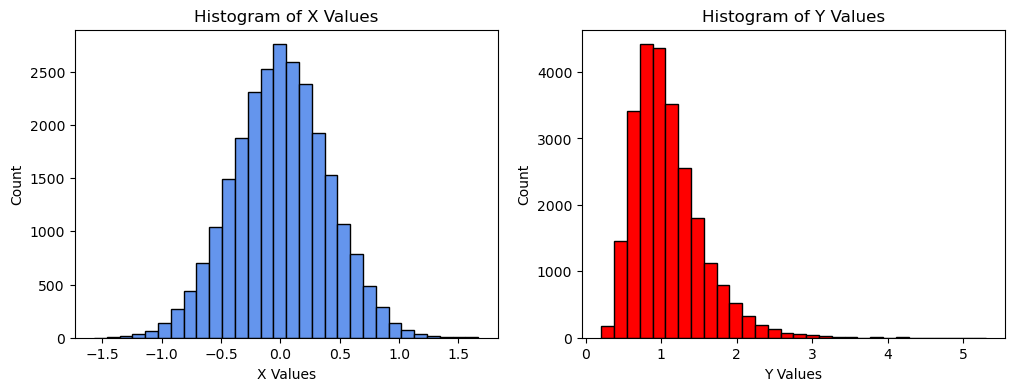

In [14]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.hist(X, edgecolor='k', color='cornflowerblue', 
         bins=30)
plt.title('Histogram of X Values')
plt.xlabel('X Values')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor='k', color='red', 
         bins=30)
plt.title('Histogram of Y Values')
plt.xlabel('Y Values')
plt.ylabel('Count')

plt.show()

    

In [15]:
mean1 = np.mean(Y < 0.5)
mean2 = np.mean(Y < 1)
mean3 = np.mean(Y < 2)

print(f"Proportion of values < 0.5: {round(mean1, 4):>6}")
print(f"Proportion of values < 1.0: {round(mean2, 4)}")
print(f"Proportion of values < 2.0: {round(mean3, 4)}")


Proportion of values < 0.5:  0.041
Proportion of values < 1.0: 0.4969
Proportion of values < 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

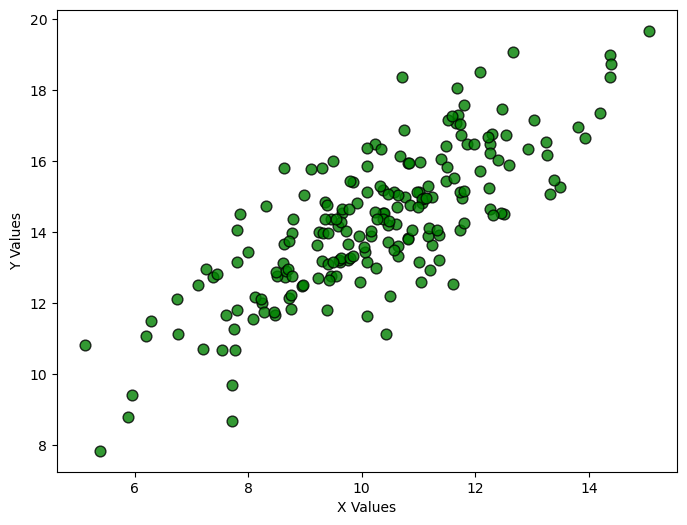

In [16]:
np.random.seed(1)

x_vals = np.random.normal(loc=10, scale=2, size=200)
errors = np.random.normal(loc=0, scale=1.2, size=200)
y_vals = 5.1 + 0.9 * x_vals + errors

plt.figure(figsize=[8, 6])
plt.scatter(x=x_vals, y=y_vals, s=60, alpha=0.8, color='green', edgecolor='k')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()


In [17]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)
numerator = np.sum(diff_x * diff_y)
denominator = np.sqrt(np.sum(diff_x ** 2) * np.sum(diff_y ** 2))
r = numerator / denominator
r = round(r, 4)

print(f"Correlation between X and Y: {r}")

Correlation between X and Y: 0.7861


## Problem 7: Relationship Between Life Expectancy and Per Capita GDP

In [18]:
import pandas as pd 
df = pd.read_csv('gapminder_data.txt', sep='\t') 
country = df.country.values 
year = df.year.values 
continent = df.continent.values 
population = df.population.values 
life_exp = df.life_exp.values 
pcgdp = df.gdp_per_cap.values 
gini = df.gini.values 
df = None 

In [19]:
continent_list = ["africa", "americas", "asia", "europe"]
color_list = ["gold", "lightseagreen", "red", "limegreen"]

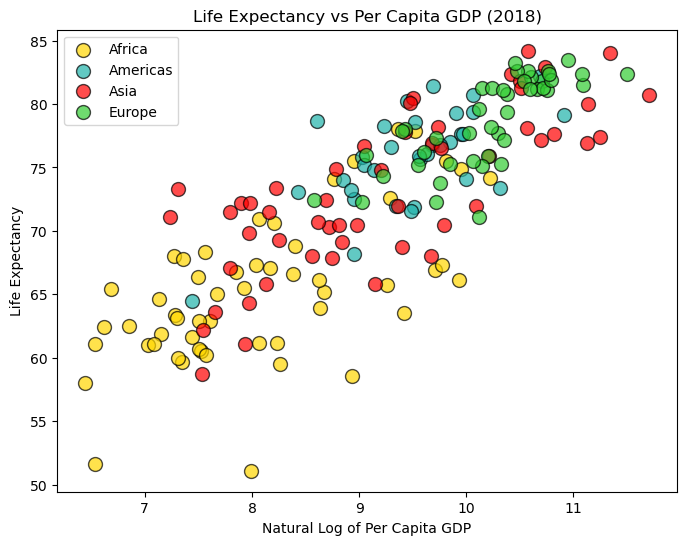

In [20]:
plt.figure(figsize=[8, 6])

for i in range(0, len(continent_list)):
    current_continent = continent_list[i]
    sel = (continent == current_continent) & (year == 2018)
    plt.scatter(x=np.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7,
            color=color_list[i], edgecolor='black', label=current_continent.title())

plt.xlabel("Natural Log of Per Capita GDP")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs Per Capita GDP (2018)")
plt.legend()

plt.show()

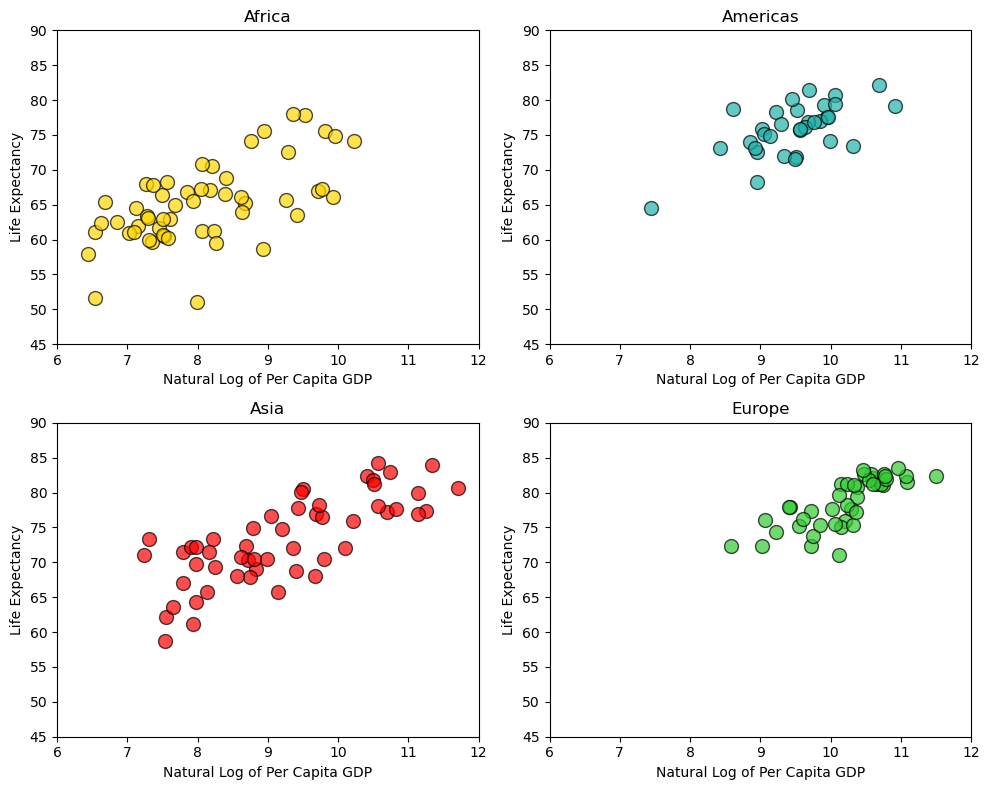

In [21]:
plt.figure(figsize=[10, 8])

for j in range (4):
    current_continent = continent_list[j]
    sel = (continent == current_continent) & (year == 2018)
    plt.subplot(2, 2, j + 1)
    plt.scatter(x=np.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7,
            color=color_list[j], edgecolor='black')
    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.xlabel("Natural Log of Per Capita GDP")
    plt.ylabel("Life Expectancy")
    plt.title(continent_list[j].title())

plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

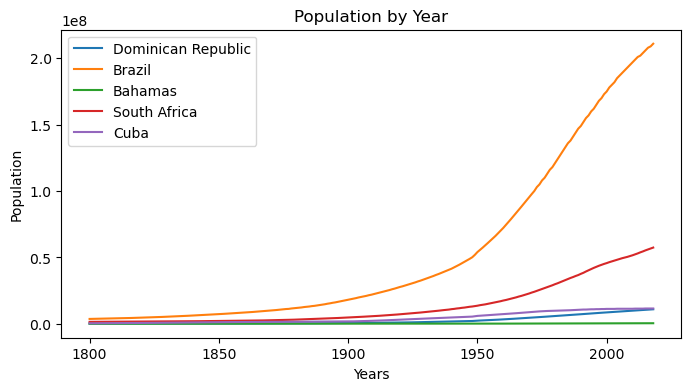

In [22]:
import matplotlib.pyplot as plt

selected_countries = ["Dominican Republic", "Brazil", "Bahamas", "South Africa", "Cuba"]

plt.figure(figsize=[8, 4])

for country_name in selected_countries:
    sel = (country == country_name)
    plt.plot(year[sel], population[sel], label=country_name)

plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Population by Year")
plt.legend()
plt.show()


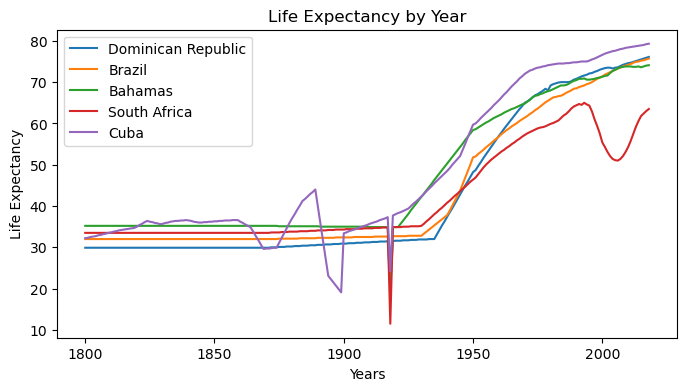

In [23]:
plt.figure(figsize=[8, 4])

for country_name in selected_countries:
    sel = (country == country_name)
    plt.plot(year[sel], life_exp[sel], label=country_name)

plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Year")
plt.legend()
plt.show()

# HIV AIDS epidemic population drop South Africa 